### **Long Short Term Memory (LSTM) MODEL**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:

df.columns


Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])

In [ ]:

df.isnull().sum()




,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df.nunique()

,0
Crop,55
Crop_Year,24
Season,6
State,30
Area,13644
Production,14016
Annual_Rainfall,634
Fertilizer,18598
Pesticide,17405
Yield,13551


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])


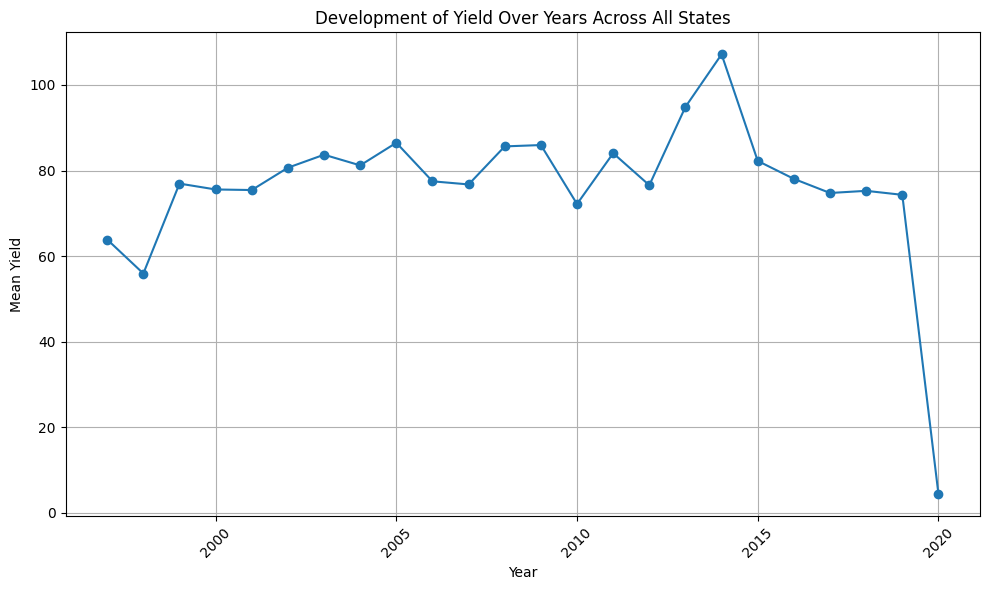

In [ ]:
import matplotlib.pyplot as plt


yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


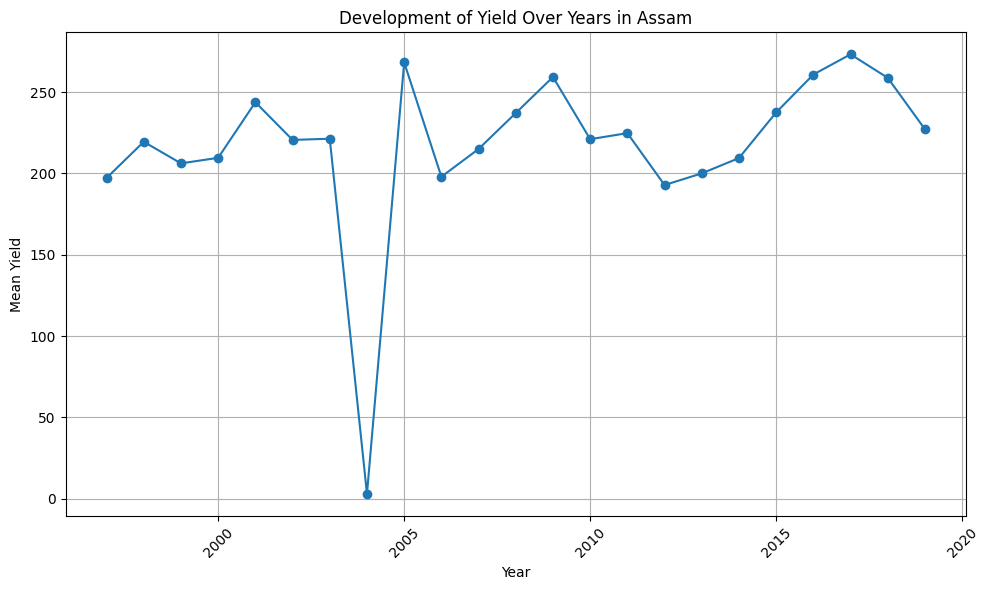

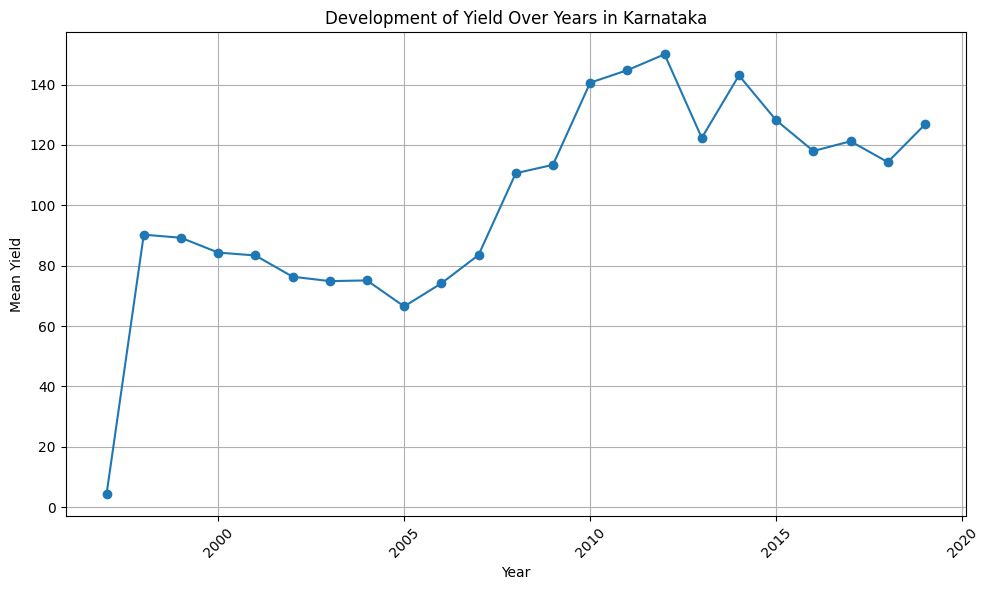

In [ ]:
states = df['State'].unique()

i = 0
for state in states:
    state_data = df[df['State'] == state]
    yearly_yield = state_data.groupby('Crop_Year')['Yield'].mean().reset_index()

    i += 1
    if i > 2:
        break

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
    plt.title(f'Development of Yield Over Years in {state}')
    plt.xlabel('Year')
    plt.ylabel('Mean Yield')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
            'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df.loc[:, features]
Y = df.loc[:, target]


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


In [ ]:
X_train.head()

,Crop_Year_scaled,crop_encoded,state_encoded,Area_scaled,Production_scaled,Annual_Rainfall_scaled,Fertilizer_scaled
12819,0.442051,4,19,-0.244847,-0.062480,-0.172796,-0.253076
14074,0.749841,52,27,-0.185947,-0.062392,-1.005467,-0.184446
14575,0.903736,41,25,-0.240269,-0.062472,-0.844491,-0.247458
7027,-1.558585,51,27,-0.243795,-0.062475,-0.678618,-0.252449
17936,0.288156,25,10,-0.245210,-0.062482,-0.673476,-0.253457


In [ ]:
Y_train.head()

,Yield_scaled
12819,-0.089916
14074,-0.090379
14575,-0.090117
7027,-0.089231
17936,-0.090405


In [ ]:
Y_train.mean()

,0
Yield_scaled,-0.001329


In [ ]:
Y_test.head()

,Yield_scaled
15342,-0.087057
17149,-0.088568
16024,-0.064189
14761,-0.089694
1632,-0.089270


In [ ]:
Y_test.mean()

,0
Yield_scaled,0.001994


In [ ]:

X_train_ls = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_ls = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
Y_train_ls = Y_train.values

print(X_train_ls.shape, X_train_ls[0])


(11813, 1, 7) [[ 0.44205067  4.         19.         -0.24484731 -0.06248026 -0.17279606
  -0.25307566]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential([
    LSTM(units=100, input_shape=(X_train_ls.shape[1], X_train_ls.shape[2])),
    Dense(units=1)
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          43,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,301 (169.14 KB)

 Trainable params: 43,301 (169.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)


history = model.fit(X_train_ls, Y_train_ls, epochs=150, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping], verbose=1)


Epoch 1/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1299 - val_loss: 0.0890
Epoch 2/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0953 - val_loss: 0.0729
Epoch 3/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0772 - val_loss: 0.0696
Epoch 4/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0660 - val_loss: 0.0701
Epoch 5/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0695 - val_loss: 0.0661
Epoch 6/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0648 - val_loss: 0.0658
Epoch 7/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0665 - val_loss: 0.0648
Epoch 8/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0589 - val_loss: 0.0657
Epoch 9/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0527 - val_loss: 0.0671
Epoch 10/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0695 - val_loss: 0.0613
Epoch 11/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0660 - val_loss: 0.0613
Epoch 12/150
296/296 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y_pred = model.predict(X_test_ls)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)
print("Mean Squared Error:", mse)


247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 0.02746397708924577
R-squared (R2): 0.8315095901489258
Mean Squared Error: 0.1722178929211687


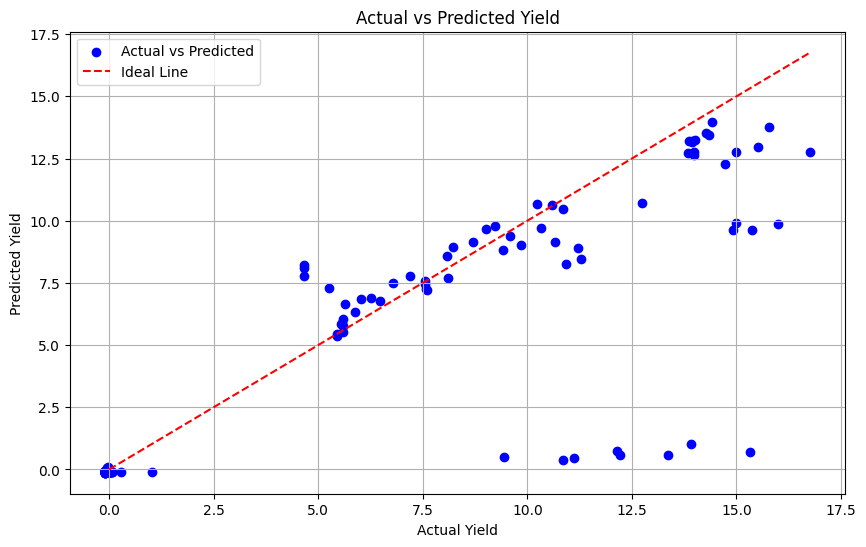

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(Y_test.values, Y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(Y_pred)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


**Feed Forward Neural Network Model (FNN)**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8542 - val_loss: 0.9275
Epoch 2/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8789 - val_loss: 0.7853
Epoch 3/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8349 - val_loss: 0.7892
Epoch 4/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7079 - val_loss: 0.7515
Epoch 5/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7628 - val_loss: 0.7247
Epoch 6/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7222 - val_loss: 0.6107
Epoch 7/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8903 - val_loss: 0.5814
Epoch 8/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5127 - val_loss: 0.4876
Epoch 9/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5136 - val_loss: 0.4757
Epoch 10/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5193 - val_loss: 0.4800
Epoch 11/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7353 - val_loss: 0.4821
Epoch 12/200
296/296 ━━━━━━━━━━━━━━━━━━━━

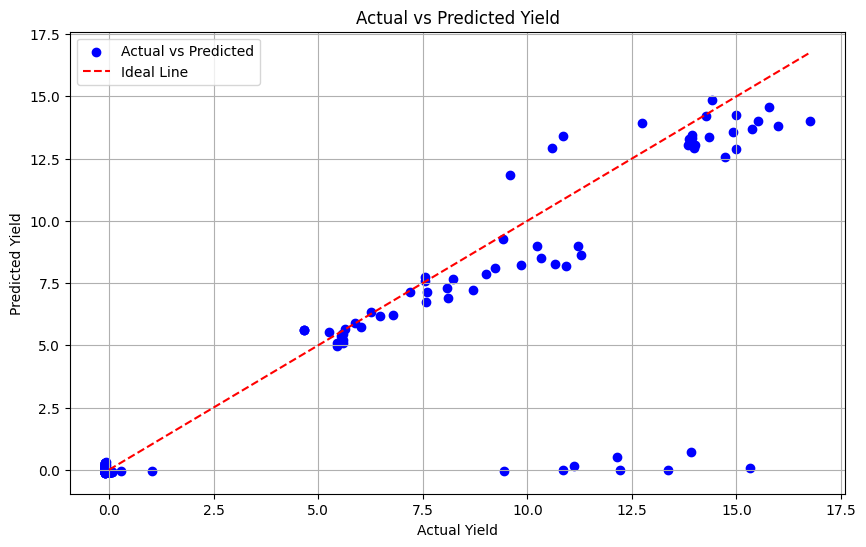

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')


df.head()


scaler = StandardScaler()

df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])


label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])

features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
            'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df.loc[:, features]
Y = df.loc[:, target]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values

model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()


early_stopping = EarlyStopping(patience=10, restore_best_weights=True)


history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


Y_pred = model.predict(X_test)


mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("R-squared (R²):", r2)
print("Mean Squared Error:", mse)


plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(Y_pred)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


**VISUALIZATION DIAGRAMS**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/crop_yield.csv')

In [ ]:
# Display first few rows of the dataset (Figure 1)
print("Figure 1: Sample Data Table")
df.head()

Figure 1: Sample Data Table


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
scaler = StandardScaler()
df['Crop_Year_scaled'] = scaler.fit_transform(df[['Crop_Year']])
df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])

# Label encoding categorical columns
label_encoder = LabelEncoder()
df['crop_encoded'] = label_encoder.fit_transform(df['Crop'])
df['season_encoded'] = label_encoder.fit_transform(df['Season'])
df['state_encoded'] = label_encoder.fit_transform(df['State'])

# Define features and target
features = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
            'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled']
target = ['Yield_scaled']

X = df.loc[:, features]
Y = df.loc[:, target]

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

# Convert data to numpy arrays
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values

# Build the neural network model
model = Sequential([
    Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.2),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# Early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Predict using the test set
Y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Display evaluation metrics
print("Mean Absolute Error:", mae)
print("R-squared (R²):", r2)
print("Mean Squared Error:", mse)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.0490 - val_loss: 0.8908
Epoch 2/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9507 - val_loss: 0.7688
Epoch 3/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9019 - val_loss: 0.7810
Epoch 4/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8563 - val_loss: 0.6488
Epoch 5/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7330 - val_loss: 0.6199
Epoch 6/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6155 - val_loss: 0.6394
Epoch 7/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4753 - val_loss: 0.5670
Epoch 8/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8272 - val_loss: 0.5323
Epoch 9/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6349 - val_loss: 0.5379
Epoch 10/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6745 - val_loss: 0.3647
Epoch 11/200
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5247 - val_loss: 0.4608
Epoch 12/200
296/296 ━━━━━━━━━━━━━━━━━━━━

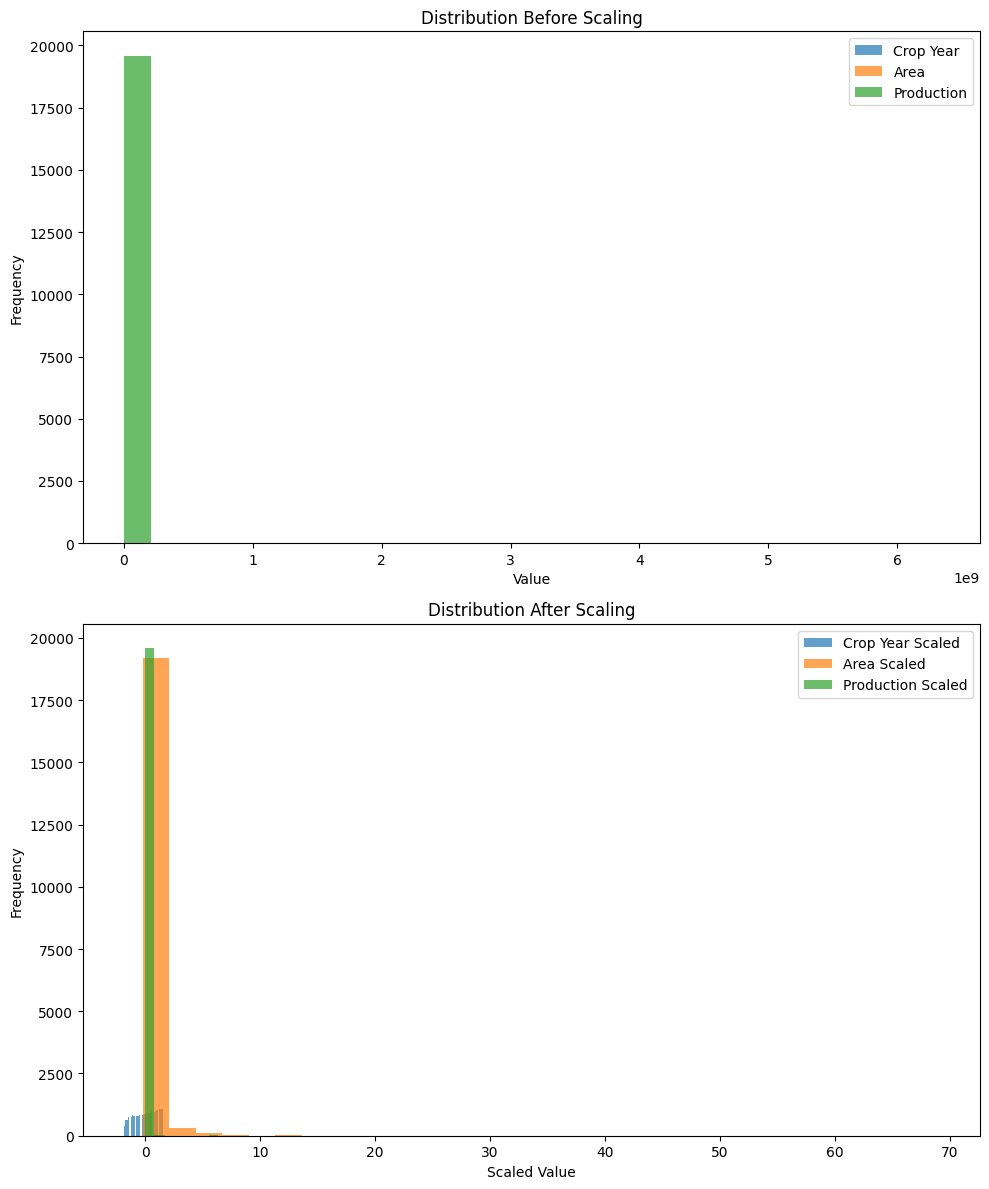

In [ ]:
# Plotting Figures:

# Figure 2: Distribution Plot of Numerical Features Before and After Scaling
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Before scaling
axes[0].hist(df['Crop_Year'], bins=30, alpha=0.7, label='Crop Year')
axes[0].hist(df['Area'], bins=30, alpha=0.7, label='Area')
axes[0].hist(df['Production'], bins=30, alpha=0.7, label='Production')
axes[0].set_title('Distribution Before Scaling')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# After scaling
axes[1].hist(df['Crop_Year_scaled'], bins=30, alpha=0.7, label='Crop Year Scaled')
axes[1].hist(df['Area_scaled'], bins=30, alpha=0.7, label='Area Scaled')
axes[1].hist(df['Production_scaled'], bins=30, alpha=0.7, label='Production Scaled')
axes[1].set_title('Distribution After Scaling')
axes[1].set_xlabel('Scaled Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Figure 3: Label Encoding Example
df_sample = df[['Crop', 'Season', 'State', 'crop_encoded', 'season_encoded', 'state_encoded']].head()
print("Figure 3: Label Encoding Example")
print(df_sample)

Figure 3: Label Encoding Example
           Crop       Season  State  crop_encoded  season_encoded  \
0      Arecanut  Whole Year   Assam             0               4   
1     Arhar/Tur  Kharif       Assam             1               1   
2   Castor seed  Kharif       Assam             8               1   
3      Coconut   Whole Year   Assam             9               4   
4  Cotton(lint)  Kharif       Assam            11               1   

   state_encoded  
0              2  
1              2  
2              2  
3              2  
4              2  


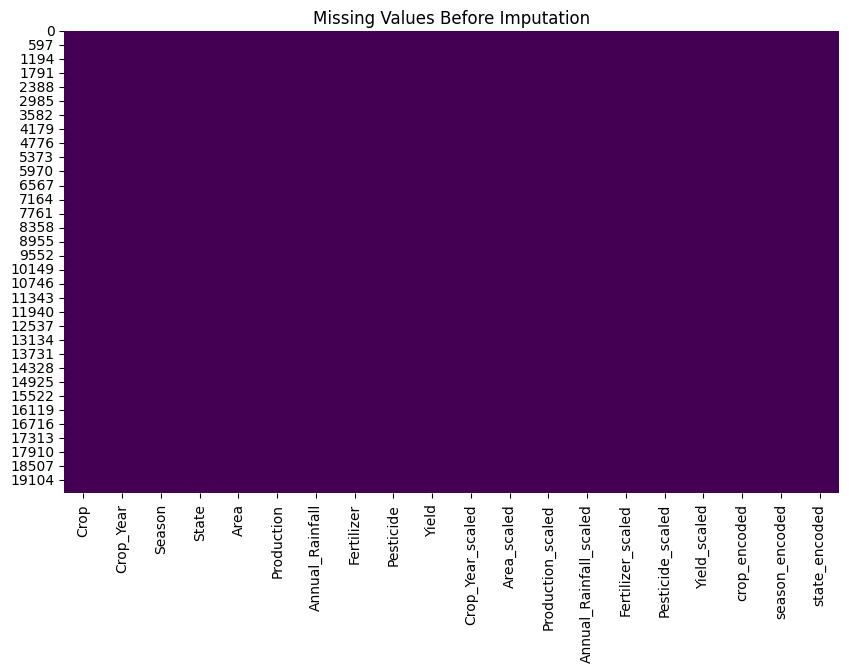

In [ ]:
# Figure 4: Data Imputation (Missing Values)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Before Imputation")
plt.show()


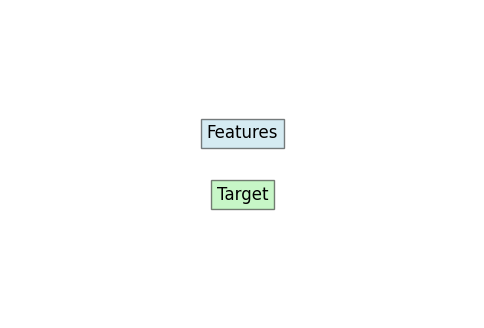

In [ ]:
# Figure 5: Feature-Target Separation Diagram
fig, ax = plt.subplots(figsize=(6, 4))
ax.text(0.5, 0.6, 'Features', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
ax.text(0.5, 0.4, 'Target', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.axis('off')
plt.show()

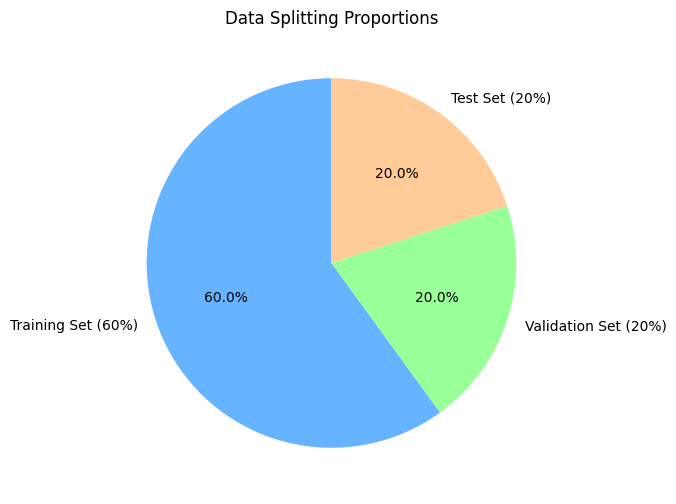

In [ ]:
# Figure 6: Data Splitting Proportion Pie Chart
labels = ['Training Set (60%)', 'Validation Set (20%)', 'Test Set (20%)']
sizes = [0.6, 0.2, 0.2]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title("Data Splitting Proportions")
plt.show()

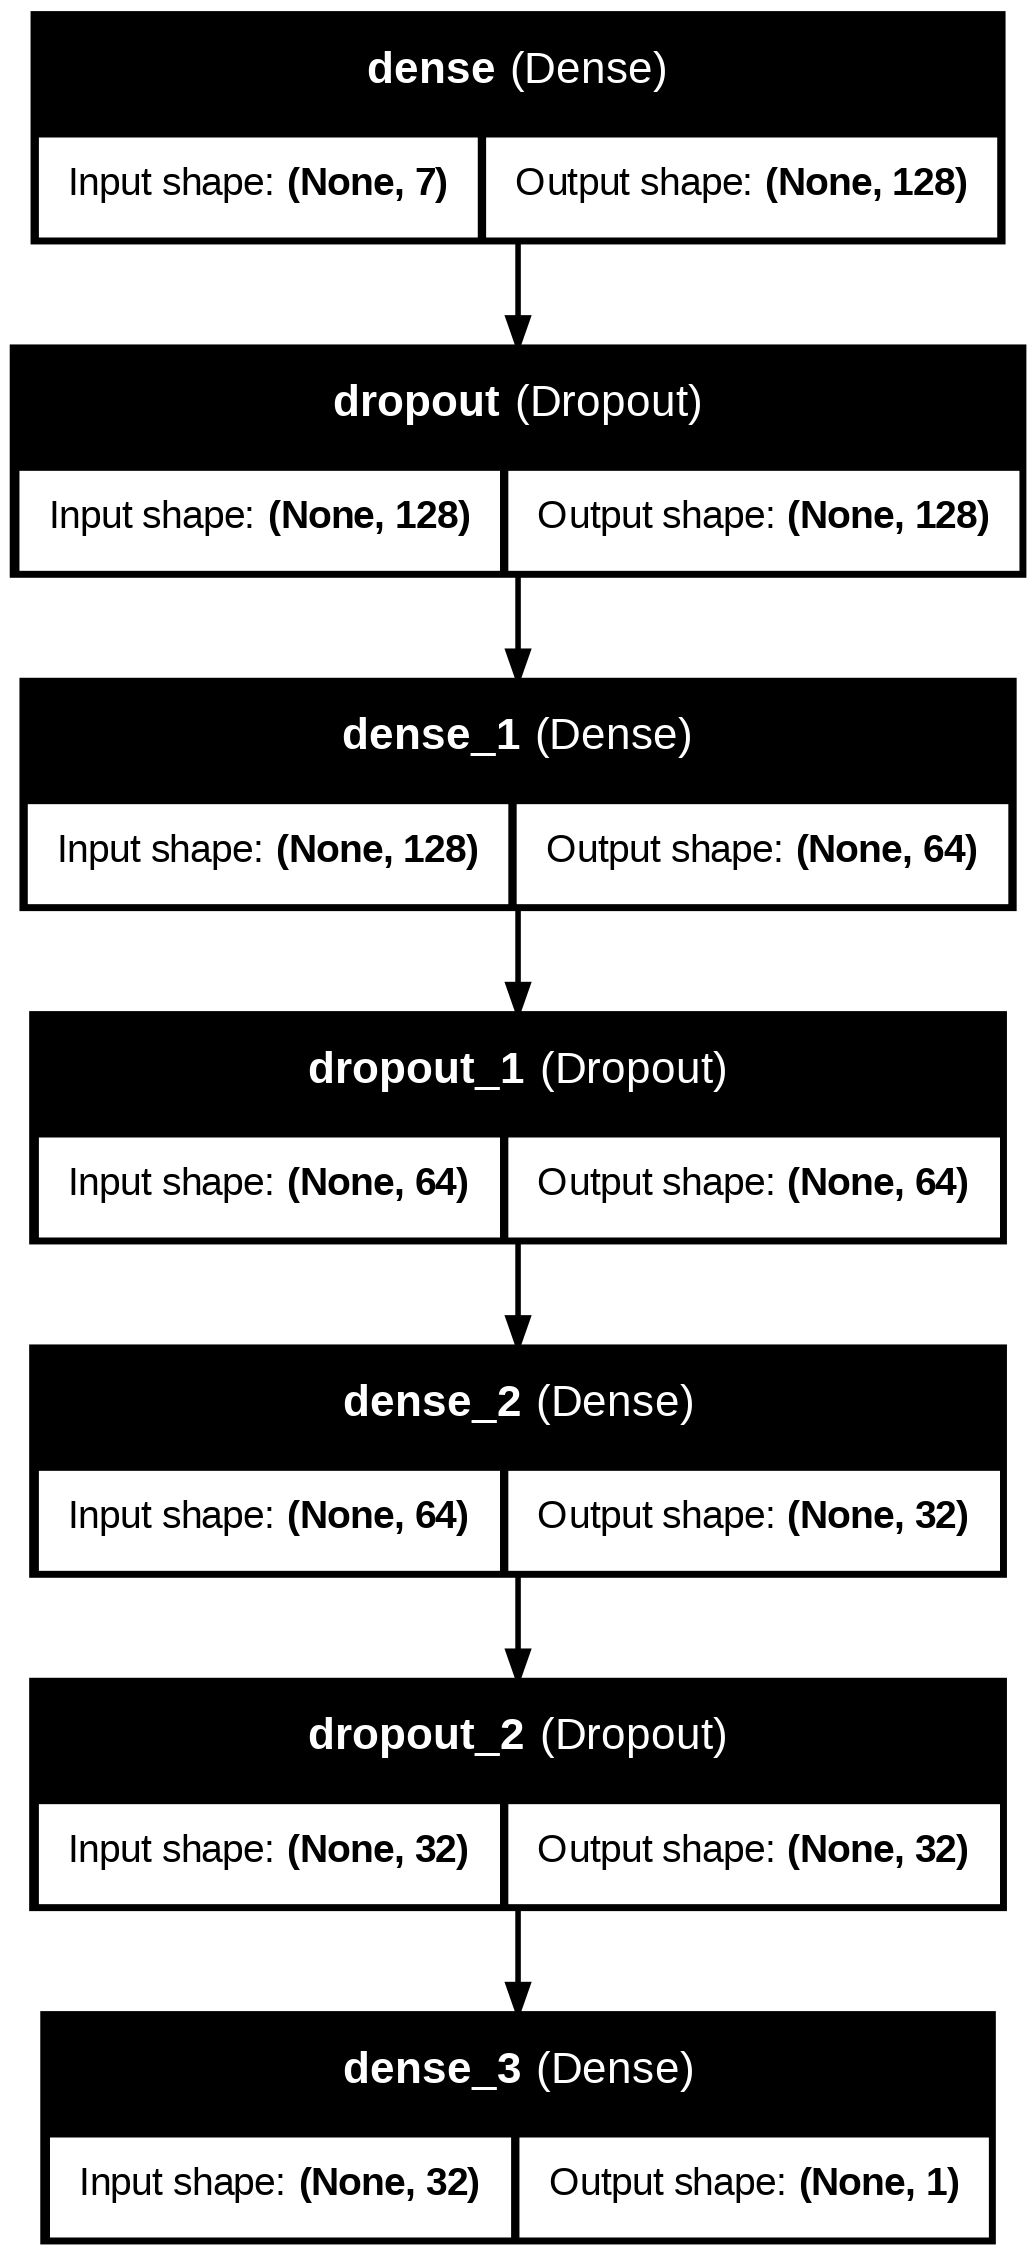

In [ ]:
# Figure 7: Neural Network Architecture Diagram (FNN)
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


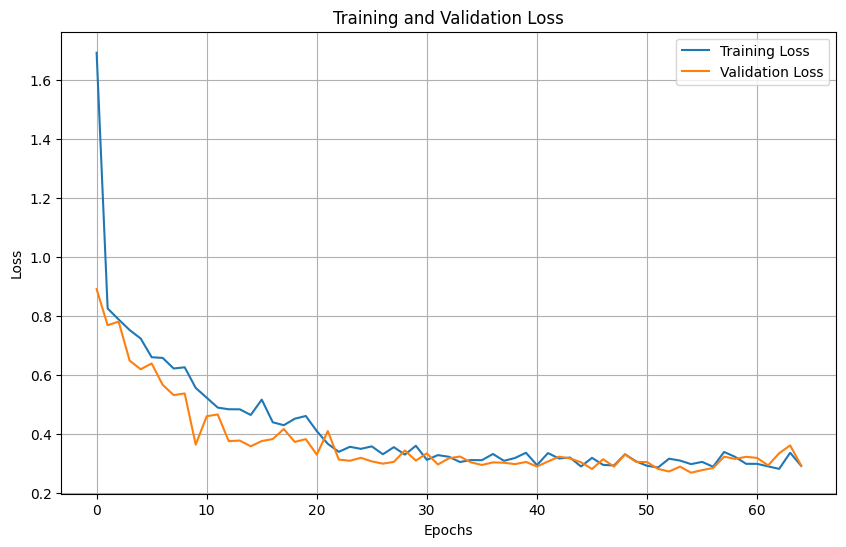

In [ ]:
# Figure 8: Training and Validation Loss Graph
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

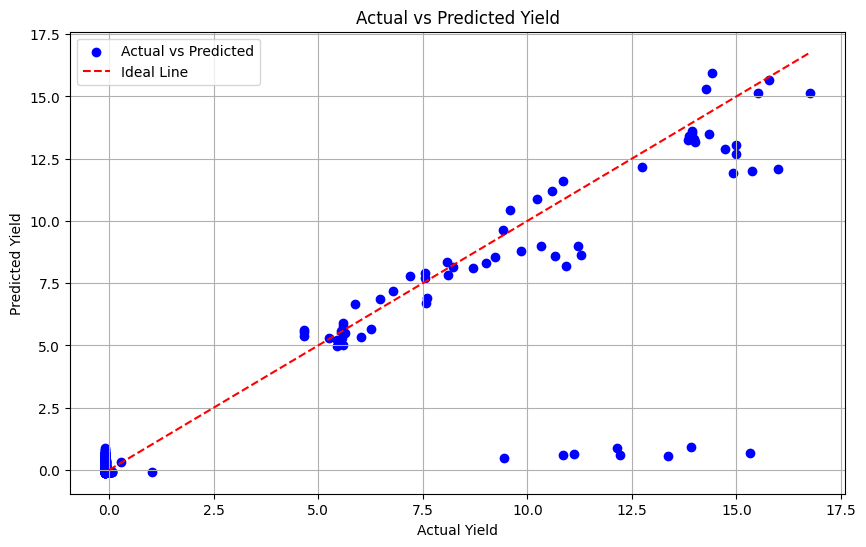

In [ ]:
# Figure 9: Actual vs Predicted Yield Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(Y_pred)])
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Figure 10: Evaluation Metrics Table
metrics = {
    'Model': ['Feedforward Neural Network'],
    'MSE': [mse],
    'MAE': [mae],
    'R²': [r2]
}
metrics_df = pd.DataFrame(metrics)
print("Figure 10: Evaluation Metrics Table")
print(metrics_df)

Figure 10: Evaluation Metrics Table
                        Model       MSE       MAE        R²
0  Feedforward Neural Network  0.159249  0.051883  0.844197


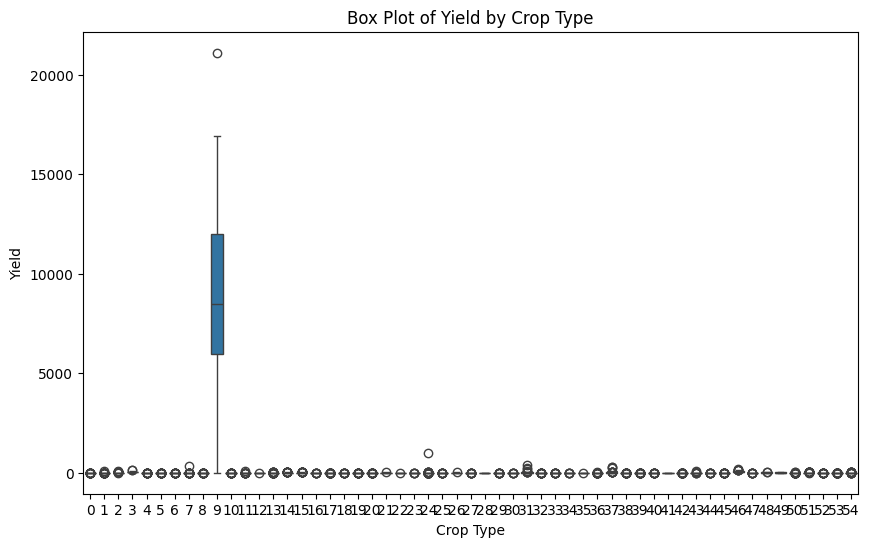

In [ ]:
# Figure 11: Box Plot of Yield by Crop Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='crop_encoded', y='Yield', data=df)
plt.title('Box Plot of Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield')
plt.show()

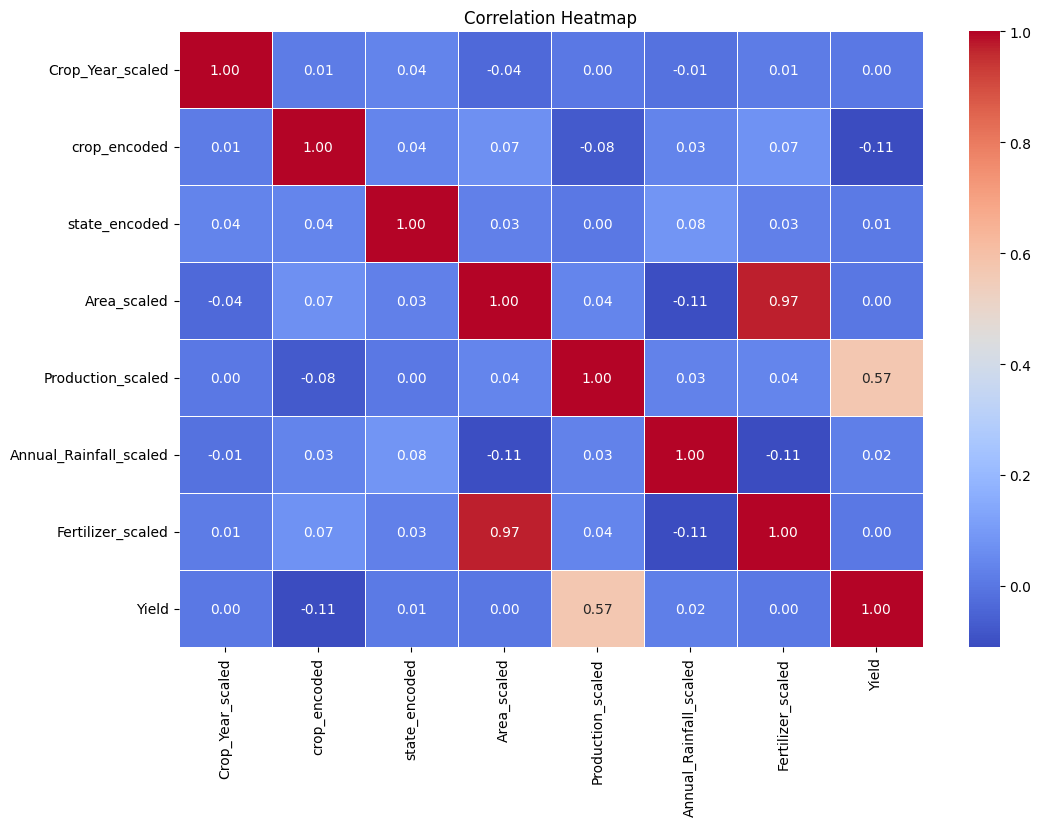

In [ ]:
# Figure 12: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[features + ['Yield']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


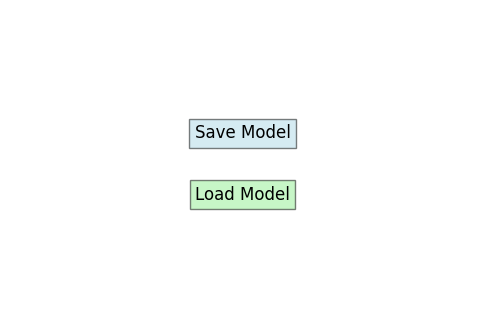

In [ ]:
# Figure 13: Model Persistence Workflow Diagram
fig, ax = plt.subplots(figsize=(6, 4))
ax.text(0.5, 0.6, 'Save Model', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
ax.text(0.5, 0.4, 'Load Model', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.axis('off')
plt.show()

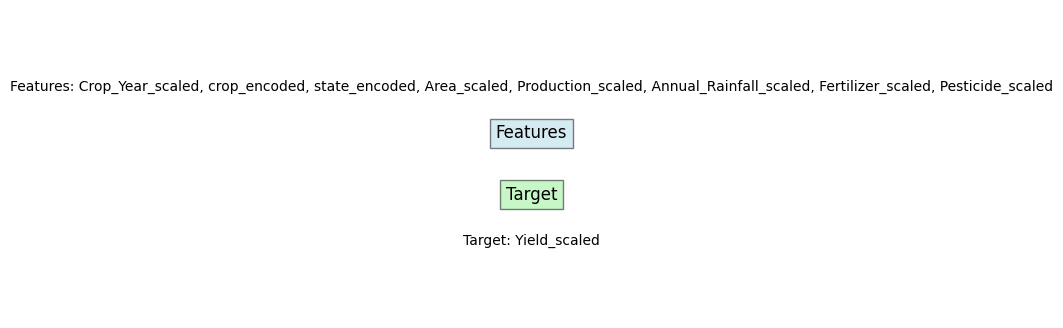

In [ ]:
# Figure 5: Feature-Target Separation Diagram
fig, ax = plt.subplots(figsize=(6, 4))

# List of features and target
features_list = ['Crop_Year_scaled', 'crop_encoded', 'state_encoded', 'Area_scaled',
                 'Production_scaled', 'Annual_Rainfall_scaled', 'Fertilizer_scaled' , 'Pesticide_scaled']
target_column = 'Yield_scaled'

# Create a simple diagram with annotations
ax.text(0.5, 0.6, 'Features', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
ax.text(0.5, 0.4, 'Target', horizontalalignment='center', verticalalignment='center', fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))

# Display the features and target as text
ax.text(0.5, 0.75, 'Features: ' + ', '.join(features_list), horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax.text(0.5, 0.25, 'Target: ' + target_column, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# Set plot limits and hide axes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.axis('off')

# Show the plot
plt.show()


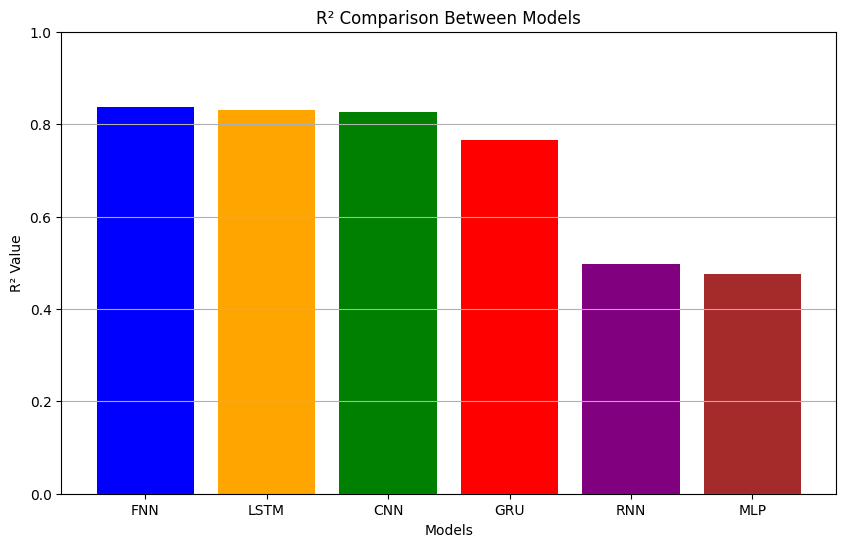

R² for FNN: 0.8379
R² for LSTM: 0.8315
R² for CNN: 0.8271
R² for GRU: 0.7655
R² for RNN: 0.4983
R² for MLP: 0.4747


In [ ]:
# Assuming the predictions for each model are stored in variables Y_pred_fnn, Y_pred_lstm, Y_pred_cnn, etc.
# Replace these variables with your actual prediction arrays after training each model.

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# R² values for each model (replace these with actual predictions)
r2_fnn = 0.8379  # Replace with actual r2_score(Y_test, Y_pred_fnn)
r2_lstm = 0.8315  # Replace with actual r2_score(Y_test, Y_pred_lstm)
r2_cnn = 0.8271  # Replace with actual r2_score(Y_test, Y_pred_cnn)
r2_gru = 0.7655 # Replace with actual r2_score(Y_test, Y_pred_gru)
r2_rnn = 0.4983  # Replace with actual r2_score(Y_test, Y_pred_rnn)
r2_mlp = 0.4747  # Replace with actual r2_score(Y_test, Y_pred_mlp)

# R² values for each model
r2_values = [r2_fnn, r2_lstm, r2_cnn, r2_gru, r2_rnn, r2_mlp]

# Model names
models = ['FNN', 'LSTM', 'CNN', 'GRU', 'RNN', 'MLP']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.title('R² Comparison Between Models')
plt.xlabel('Models')
plt.ylabel('R² Value')
plt.ylim(0, 1)  # R² values range from 0 to 1
plt.grid(True, axis='y')
plt.show()

# Output R² values in the console (optional)
for model, r2 in zip(models, r2_values):
    print(f'R² for {model}: {r2:.4f}')
